<a href="https://www.kaggle.com/code/hipparkarrahul18/logistics-data-eda-and-feature-engineering?scriptVersionId=200328605" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Defining Problem Statement and Analysing basic metrics

**About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

**How can you help here?**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

**Column Profiling:**

* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type
* FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
* Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
* destination_cente – Destination ID
* destination_name – Destination Name
* od_start_time – Trip start time
* od_end_time – Trip end time
* start_scan_to_end_scan – Time taken to deliver from source to destination
* is_cutoff – Unknown field
* cutoff_factor – Unknown field
* cutoff_timestamp – Unknown field
* actual_distance_to_destination – Distance in Kms between source and destination warehouse
* actual_time – Actual time taken to complete the delivery (Cumulative)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
* factor – Unknown field
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
* segment_factor – Unknown field

**Concept Used:**

* Feature Creation
* Relationship between Features
* Column Normalization /Column Standardization
* Handling categorical values
* Missing values - Outlier treatment / Types of outliers

## Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt # To convert columns into datetime colums
import matplotlib.pyplot as plt # data visualisation library
import seaborn as sns #data visualisation library built on the top of the matplotlib
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import ttest_ind, mannwhitneyu
import plotly.subplots as sp

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhivery-data/delhivery_data.csv


## Importing Dataset

In [2]:
df=pd.read_csv('/kaggle/input/delhivery-data/delhivery_data.csv')
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


## Basic Analysis

### Shape of the data

In [3]:
df.shape

(144867, 24)

**Analysis:**

* Shape of dataframe is 144867 * 24
* Number of rows = 144867
* Number of columns = 24

### First 5 rows

In [4]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Columns in a Dataframe

In [5]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

### Data-type of all attributes or concise summary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**Inference**:

1. All columns, except 'is_cutoff,' are either of object or numeric type, while 'is_cutoff' is of boolean type.
2. The 'source_name' and 'destination_name' columns contain missing values. During data preprocessing, we will develop a strategy to address these missing values. Options include either dropping the missing values if they constitute less than 50% of the data or imputing them using a specific strategy.
3. We can split and extract features from the 'destination_name' column into two distinct features: City and place-code (State). This can provide additional information and improve the granularity of the dataset.
4. In feature engineering, we'll extract details like month, year, and day from the 'trip_creation_time' column to enhance our dataset.

## Statistical Summary

**Statistical Summary of Numeric columns**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


**Statistical Summary of Object columns**

In [8]:
df.describe(include='object').T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


### Unique Values

In [9]:
print('---- Unique Values in Columns ----')
print()
for i in df.columns:
    print(f"{i}: {df[i].nunique()}")
    print()

---- Unique Values in Columns ----

data: 2

trip_creation_time: 14817

route_schedule_uuid: 1504

route_type: 2

trip_uuid: 14817

source_center: 1508

source_name: 1498

destination_center: 1481

destination_name: 1468

od_start_time: 26369

od_end_time: 26369

start_scan_to_end_scan: 1915

is_cutoff: 2

cutoff_factor: 501

cutoff_timestamp: 93180

actual_distance_to_destination: 144515

actual_time: 3182

osrm_time: 1531

osrm_distance: 138046

factor: 45641

segment_actual_time: 747

segment_osrm_time: 214

segment_osrm_distance: 113799

segment_factor: 5675



# Data Preprocessing

## Handling missing values 

In [10]:
(df.isnull().sum()/len(df))*100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

**Inference**:

Observing approximately 0.2% missing values in the 'source_name' column and 0.18% in the 'destination_name' column, which is less than 0.5% of the data, dropping these rows is not expected to significantly impact the dataset.

In [11]:
df.dropna(how='any',inplace=True)

In [12]:
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

**Inference**

The dataframe is now clean, with no missing values, as we used the dropna() method to remove them.

In [13]:
df.shape

(144316, 24)

##  Converting time columns into pandas datetime

To extract important features like month, year, day, hour, etc., and create additional meaningful features, it's necessary to convert the time columns from numeric to pandas datetime format.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            

In [15]:
df[['trip_creation_time','od_start_time','od_end_time']]=df[['trip_creation_time','od_start_time','od_end_time']].apply(pd.to_datetime)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [17]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## Merging columns

### Grouping by Segment

**Create a unique identifier for different segments of a trip based on the combination of the trip_uuid, source_center, and destination_center and
name it as segment_key.**

In [18]:
df['segment_key']=df['trip_uuid']+'_'+df['source_center']+'_'+df['destination_center']

In [19]:
df['segment_key']

0         trip-153741093647649320_IND388121AAA_IND388620AAB
1         trip-153741093647649320_IND388121AAA_IND388620AAB
2         trip-153741093647649320_IND388121AAA_IND388620AAB
3         trip-153741093647649320_IND388121AAA_IND388620AAB
4         trip-153741093647649320_IND388121AAA_IND388620AAB
                                ...                        
144862    trip-153746066843555182_IND131028AAB_IND000000ACB
144863    trip-153746066843555182_IND131028AAB_IND000000ACB
144864    trip-153746066843555182_IND131028AAB_IND000000ACB
144865    trip-153746066843555182_IND131028AAB_IND000000ACB
144866    trip-153746066843555182_IND131028AAB_IND000000ACB
Name: segment_key, Length: 144316, dtype: object

**Group the rows based on the 'segment_key' and compute the cumulative sum for the columns 'segment_actual_time', 'segment_osrm_distance', and 'segment_osrm_time'**

In [20]:
df['segment_actual_time_sum']=df.groupby(['segment_key'])['segment_actual_time'].cumsum()
df['segment_osrm_time_sum']=df.groupby(['segment_key'])['segment_osrm_time'].cumsum()
df['segment_osrm_distance_sum']=df.groupby(['segment_key'])['segment_osrm_distance'].cumsum()


In [21]:
df[['segment_key','segment_actual_time_sum','segment_osrm_time_sum','segment_osrm_distance']]

,segment_key,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance
0,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.0,11.9653
1,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,20.0,9.7590
2,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,27.0,10.8152
3,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,39.0,13.0224
4,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,44.0,3.9153
...,...,...,...,...
144862,trip-153746066843555182_IND131028AAB_IND000000ACB,92.0,94.0,8.1858
144863,trip-153746066843555182_IND131028AAB_IND000000ACB,118.0,115.0,17.3725
144864,trip-153746066843555182_IND131028AAB_IND000000ACB,138.0,149.0,20.7053
144865,trip-153746066843555182_IND131028AAB_IND000000ACB,155.0,176.0,18.8885


In [22]:
df.shape

(144316, 28)

**Aggregating data at segment level**

In [23]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum'],
      dtype='object')

In [24]:
segment_dict={
    'data':'first',
    'trip_creation_time':'first',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'trip_uuid':'first',
    
    'source_center':'first',
    'source_name':'first',
    
    'destination_center':'last',
    'destination_name':'last',
    
    'od_start_time':'first',
    'od_end_time':'first',
    'start_scan_to_end_scan':'first',
    
    'actual_distance_to_destination':'last',
    'actual_time':'last',
    
    'osrm_time':'last', 
    'osrm_distance':'last', 
    
    'segment_actual_time_sum':'last',
    'segment_osrm_time_sum':'last',
    'segment_osrm_distance_sum':'last'
    
}

In [25]:
segment_df=df.groupby('segment_key').agg(segment_dict).reset_index()
segment_df

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


**Sort the resulting DataFrame segment, by two criteria:**'

1. First, it sorts by segment_key to ensure that segments are ordered consistently.
2. Second, it sorts by od_end_time in ascending order, ensuring that segments within the same trip are ordered by their end times from earliest to latest.

In [26]:
segment_df.sort_values(by=['segment_key','od_end_time'],ascending=[True,True],inplace=True)

In [27]:
segment_df

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


Later on, we can conduct segment-level analysis by leveraging the aggregated data, allowing us to extract valuable insights from the accumulated information at the segment level.

# Feature Engineering

## Calculating the time taken between od_start_time and od_end_time

In [28]:
segment_df['od_time_diff_hour']=(segment_df['od_end_time']-segment_df['od_start_time']).dt.total_seconds()/60
segment_df

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.604421
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.505379
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.832388
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.779486
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,62.115193
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,91.087797
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,44.174403
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,287.474007


## Aggregating data at trip level

In [29]:
trip_dict={
    'data':'first',
    'trip_creation_time':'first',
    'route_schedule_uuid':'first',
    'route_type':'first',
    
    'source_center':'first',
    'source_name':'first',
    
    'destination_center':'last',
    'destination_name':'last',
    
    'od_time_diff_hour':'sum',
    'start_scan_to_end_scan':'sum',
    
    'actual_distance_to_destination':'sum',
    'actual_time':'sum',
    
    'osrm_time':'sum', 
    'osrm_distance':'sum', 
    
    'segment_actual_time_sum':'sum',
    'segment_osrm_time_sum':'sum',
    'segment_osrm_distance_sum':'sum'
    
}

In [30]:
trip_df=segment_df.groupby('trip_uuid').agg(trip_dict).reset_index()
trip_df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.109800,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.611874,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.362520,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.494935,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.349042,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.028928,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.590521,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.119867,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.512862,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


## Extracting Features out of Source and Destination

In [31]:
string='kanpur_central_H_6(Uttar_Pradesh)'
lst=string.split('(')[0]
lst.split('_')[1]

'central'

In [32]:
trip_df['source_name']=trip_df['source_name'].str.lower()
trip_df['destination_name']=trip_df['destination_name'].str.lower()

**Function to extract state from source and destination**

In [33]:
def extract_state(x):
    state=x.split('(')[1]
    return state[:-1]

**Function to extract city from source and destination**

In [34]:
def extract_city(x):
    city=x.split('(')[0]
    city=city.split('_')[0]
    
    #handling edge cases
    if city == "pnq vadgaon sheri dpc":
        return 'vadgaonsheri'
    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'Pune'
    
    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'
    
    return city

**Function to extract place from source and destination**

In [35]:
def extract_place(x):
    #remove state 
    x=x.split('(')[0]
    
    city_len=len(x.split('_'))
    
    if city_len>=3:
        return x.split('_')[1]
    
    #small cities have same city and place name
    if city_len==2:
        return x.split('_')[0]
    
    #edge case
    return x.split(' ')[0]

**Function to extract code from source and destination**

In [36]:
def extract_code(x):
    x=x.split('(')[0]
    if len(x.split('_'))>=3:
        return x.split('_')[-1]
    return 'none'

In [37]:
num=[1,2,3,4,5]
squares=list(map(lambda x:x**2,num))
squares

[1, 4, 9, 16, 25]

**Extracting state,city, place and code features from 'destination_name' column**

In [38]:
trip_df['destination_state']=trip_df['destination_name'].apply(lambda x:extract_state(x))
trip_df['destination_city']=trip_df['destination_name'].apply(lambda x: extract_city(x))
trip_df['destination_place']=trip_df['destination_name'].apply(lambda x:extract_place(x))
trip_df['destination_code']=trip_df['destination_name'].apply(lambda x:extract_code(x))


In [39]:
trip_df[['destination_state','destination_city','destination_place','destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirchchndr,shnmgprm,d


**Extracting state,city, place and code features from 'source_name' column**

In [40]:
trip_df['source_state']=trip_df['source_name'].apply(lambda x:extract_state(x))
trip_df['source_city']=trip_df['source_name'].apply(lambda x: extract_city(x))
trip_df['source_place']=trip_df['source_name'].apply(lambda x:extract_place(x))
trip_df['source_code']=trip_df['source_name'].apply(lambda x:extract_code(x))

In [41]:
trip_df[['source_state','source_city','source_place','source_code']]

,source_state,source_city,source_place,source_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai hub,mumbai,none
4,karnataka,bellary,bellary,none
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,fbd,balabhgarh,dpc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirunelveli,vdkkusrt,i


## Extracting features from trip_creation_time

In [42]:
trip_df['trip_year']=trip_df['trip_creation_time'].dt.year
trip_df['trip_month']=trip_df['trip_creation_time'].dt.month
trip_df['trip_week']=trip_df['trip_creation_time'].dt.isocalendar().week
trip_df['trip_day']=trip_df['trip_creation_time'].dt.day
trip_df['trip_day_of_week']=trip_df['trip_creation_time'].dt.dayofweek
trip_df['trip_hour']=trip_df['trip_creation_time'].dt.hour

In [43]:
trip_df[['trip_year','trip_month','trip_week','trip_day','trip_day_of_week','trip_hour']]

,trip_year,trip_month,trip_week,trip_day,trip_day_of_week,trip_hour
0,2018,9,37,12,2,0
1,2018,9,37,12,2,0
2,2018,9,37,12,2,0
3,2018,9,37,12,2,0
4,2018,9,37,12,2,0
...,...,...,...,...,...,...
14782,2018,10,40,3,2,23
14783,2018,10,40,3,2,23
14784,2018,10,40,3,2,23
14785,2018,10,40,3,2,23


## Handling outliers using IQR method

In [44]:
num_cols=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance',
          'segment_actual_time_sum','segment_osrm_time_sum','segment_osrm_distance_sum','od_time_diff_hour']

**Outliers detection  using Boxplot**

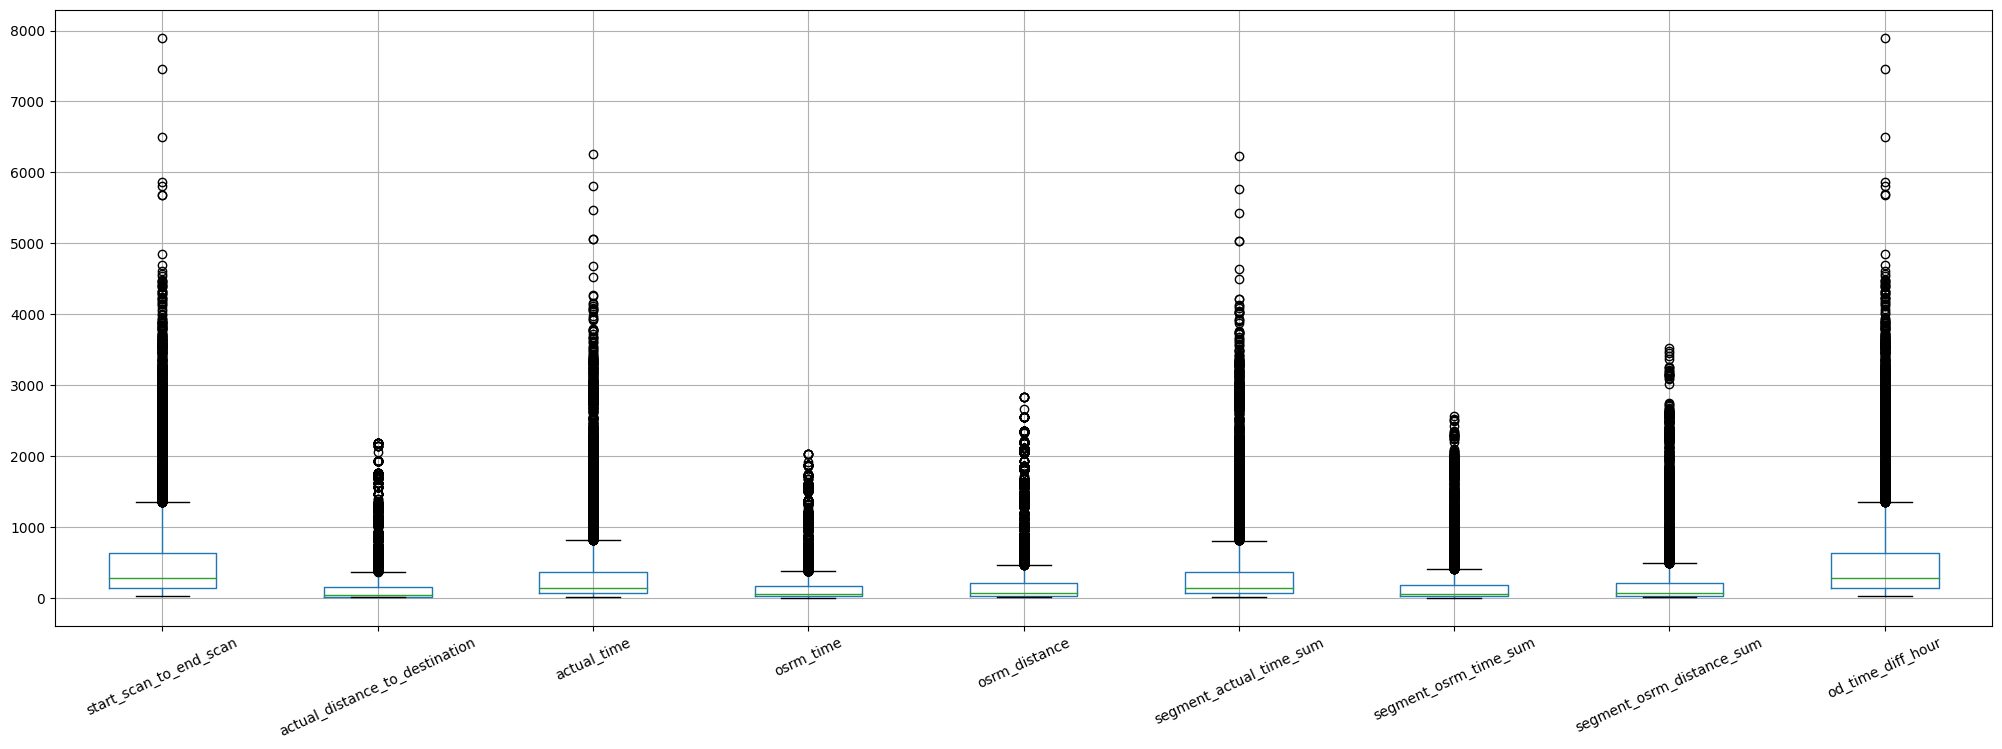

In [45]:
trip_df[num_cols].boxplot(rot=25,figsize=(25,8))
plt.show()

**Handling outliers using the IQR method**

In [46]:
len_before=len(trip_df)

In [47]:
q1=trip_df[num_cols].quantile(0.25)
q3=trip_df[num_cols].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

In [48]:
trip_df=trip_df.loc[~((trip_df[num_cols]<lower_bound)|(trip_df[num_cols]>upper_bound)).any(axis=1)]
trip_df=trip_df.reset_index(drop=True)
trip_df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_time_diff_hour,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_week,trip_day,trip_day_of_week,trip_hour
0,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),181.611874,...,karnataka,doddablpur,chikadpp,d,2018,9,37,12,2,0
1,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.494935,...,maharashtra,mumbai hub,mumbai,none,2018,9,37,12,2,0
2,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),718.349042,...,karnataka,bellary,bellary,none,2018,9,37,12,2,0
3,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),190.487849,...,tamil nadu,chennai,chennai,none,2018,9,37,12,2,0
4,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.005634,...,tamil nadu,chennai,chrompet,dpc,2018,9,37,12,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),258.028928,...,punjab,chandigarh,mehmdpur,h,2018,10,40,3,2,23
12719,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.590521,...,haryana,fbd,balabhgarh,dpc,2018,10,40,3,2,23
12720,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),422.119867,...,uttar pradesh,kanpur,govndngr,dc,2018,10,40,3,2,23
12721,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),348.512862,...,tamil nadu,tirunelveli,vdkkusrt,i,2018,10,40,3,2,23


In [49]:
len_after= len(trip_df)

**Visualizing outliers using the Box plot**

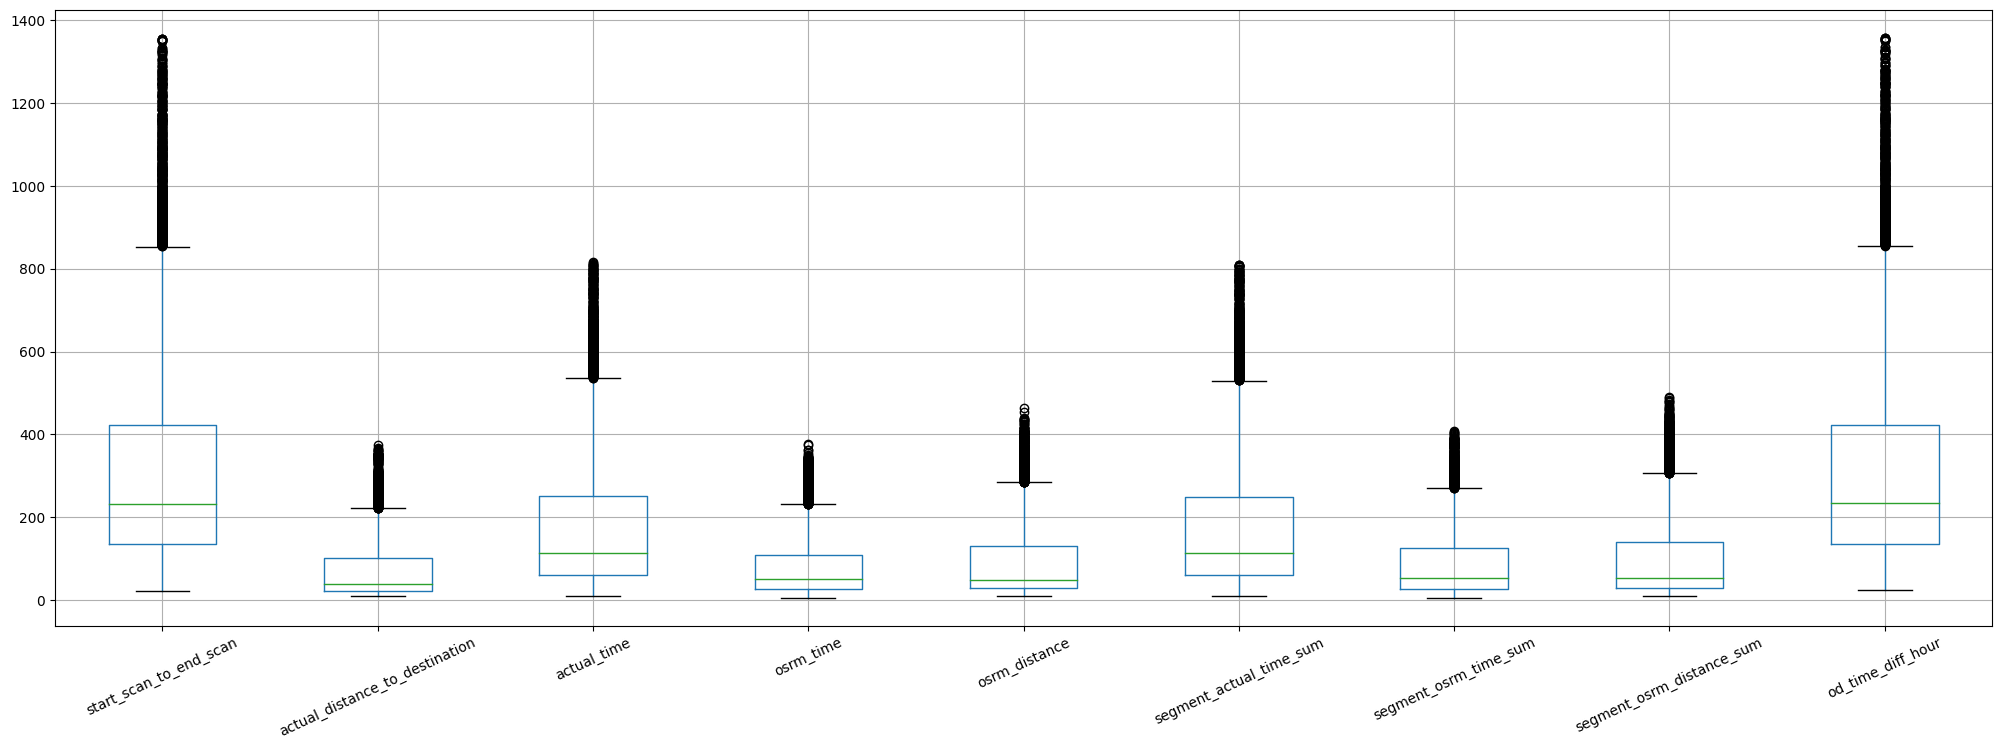

In [50]:
trip_df[num_cols].boxplot(rot=25,figsize=(25,8))
plt.show()

**Calculating percentage outliers removed from the dataset using the IQR method**

In [51]:
#Calculating percentage outliers removed from the dataset using the IQR method
((len_before-len_after)*100)/len_before

13.958206532765267

**Inference**:

Around 14% of outliers have been successfully removed from the data utilizing the IQR method. However, retaining the remaining outliers is essential, as further removal might lead to significant data loss.

## Performing one-hot encoding on categorical features

**Value-counts before applying one-hot encoding**

In [52]:
trip_df['route_type'].value_counts()

route_type
Carting    8812
FTL        3911
Name: count, dtype: int64

In [53]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
trip_df['route_type']=enc.fit_transform(trip_df[['route_type']]).toarray()
trip_df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_time_diff_hour,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_week,trip_day,trip_day_of_week,trip_hour
0,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,1.0,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),181.611874,...,karnataka,doddablpur,chikadpp,d,2018,9,37,12,2,0
1,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,1.0,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.494935,...,maharashtra,mumbai hub,mumbai,none,2018,9,37,12,2,0
2,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,0.0,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),718.349042,...,karnataka,bellary,bellary,none,2018,9,37,12,2,0
3,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,1.0,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),190.487849,...,tamil nadu,chennai,chennai,none,2018,9,37,12,2,0
4,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,1.0,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.005634,...,tamil nadu,chennai,chrompet,dpc,2018,9,37,12,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,1.0,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),258.028928,...,punjab,chandigarh,mehmdpur,h,2018,10,40,3,2,23
12719,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,1.0,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.590521,...,haryana,fbd,balabhgarh,dpc,2018,10,40,3,2,23
12720,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,1.0,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),422.119867,...,uttar pradesh,kanpur,govndngr,dc,2018,10,40,3,2,23
12721,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,1.0,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),348.512862,...,tamil nadu,tirunelveli,vdkkusrt,i,2018,10,40,3,2,23


**Value-Counts after applying one-hot encoding**

In [54]:
trip_df['route_type'].value_counts()

route_type
1.0    8812
0.0    3911
Name: count, dtype: int64

**Inference**:

1: Carting

0: FTL

## Normalizing/ Standardizing the numerical features using MinMaxScaler or StandardScaler

**About MinMaxScaler**:

MinMaxScaler is a simple and effective linear scaling function. It scales the data set between 0 and 1. In other words, the minimum and maximum values in the scaled data set are 0 and 1 respectively. MinMax Scaler is often used as an alternative to Standard Scaler if zero mean and unit variance want to be avoided. 

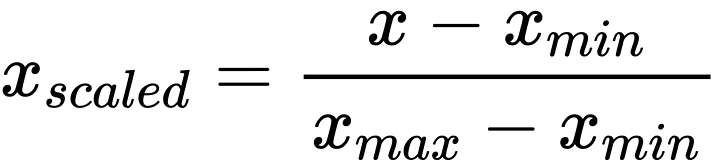

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
trip_df[num_cols]=scaler.fit_transform(trip_df[num_cols])
trip_df[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
0,0.117868,0.176119,0.166253,0.167568,0.167335,0.164794,0.146766,0.156330,0.118559
1,0.057808,0.022426,0.062035,0.024324,0.023343,0.062422,0.024876,0.022484,0.057749
2,0.521021,0.325009,0.411911,0.300000,0.303075,0.413233,0.271144,0.286617,0.520930
3,0.124625,0.042791,0.064516,0.045946,0.041795,0.063670,0.042289,0.039525,0.125213
4,0.056306,0.000269,0.018610,0.018919,0.006482,0.018727,0.017413,0.006130,0.055883
...,...,...,...,...,...,...,...,...,...
12718,0.175676,0.133794,0.091811,0.151351,0.141702,0.091136,0.139303,0.116092,0.175846
12719,0.027778,0.017867,0.014888,0.016216,0.015438,0.014981,0.012438,0.014600,0.027834
12720,0.298799,0.081447,0.338710,0.113514,0.109662,0.339576,0.203980,0.199405,0.298859
12721,0.243243,0.344973,0.316377,0.467568,0.356592,0.310861,0.534826,0.446327,0.243678


# Visual Analysis

## Monthly distribution  of trips

In [56]:
labels=trip_df['trip_creation_time'].dt.month_name().value_counts().index


values= trip_df['trip_month'].value_counts()

#create pie chart
# Create pie chart
colors = ['#ADE25D','#FCEC52']

pie_chart = go.Figure(go.Pie(labels=labels, values=values))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Monthly Distribution of Trips",
                xaxis=dict(title='Month',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of Trips',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()

**Insight**:

A significant seasonality peak is evident in the data, with 87.8% of trips occurring in September, reflecting the festive months in India. Conversely, only 12.2% of trips were completed in October.

## Distribution of the route type

In [57]:
labels= ['Carting','FTL']


values= trip_df['route_type'].value_counts()

#create pie chart
# Create pie chart
colors = ['#A6B1E1','#CACFD6']

pie_chart = go.Figure(go.Pie(labels=labels, values=values))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Route Type across Trips",
                xaxis=dict(title='Route Type',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of Trips',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()

**Insight**:

In the year 2018, Delhivery executed a diverse range of delivery strategies, with a noteworthy 69.3% of completed trips falling under the Carting route type. This emphasizes a significant preference for more flexible and localized transport solutions. On the other hand, 30.7% of deliveries were classified under the Full Truckload (FTL) route type, indicating a substantial portion of shipments requiring dedicated and comprehensive transportation solutions. The distribution between Carting and FTL underscores Delhivery's adaptability in catering to varied logistical needs, ensuring an efficient and tailored approach to meet the demands of their clientele.

## Trips created on day to day basis

In [58]:
trip_df['trip_day'].value_counts()

trip_day
18    696
15    677
13    652
12    638
22    628
21    624
17    622
14    616
20    599
26    586
25    583
19    577
27    568
24    562
3     551
28    534
29    531
23    529
1     513
16    508
2     487
30    442
Name: count, dtype: int64

In [59]:
day_df=trip_df.groupby('trip_day').agg(No_Trips_Created=('trip_uuid','count')).reset_index()
day_df['Percent']= np.round((day_df['No_Trips_Created']*100)/day_df['No_Trips_Created'].sum(),2)
day_df

,trip_day,No_Trips_Created,Percent
0,1,513,4.03
1,2,487,3.83
2,3,551,4.33
3,12,638,5.01
4,13,652,5.12
5,14,616,4.84
6,15,677,5.32
7,16,508,3.99
8,17,622,4.89
9,18,696,5.47


In [60]:
fig=px.line(day_df,x='trip_day',y='No_Trips_Created',markers=True)
fig.update_xaxes(tickvals=list(range(31)))
fig.update_layout(title='Trips created on day to day basis', xaxis_title='Day', yaxis_title='Number of trips Created')

**Insight**:

1. More trips tend to be created from the 3rd to the 14th day of the month, showing a noticeable upward trend.
2. The peak day for trip creation occurs on the 18th day of the month, constituting 5.47% of the total number of trips generated.
3. There is a notable decrease in trip creation during the last two days of the month, indicating a lower frequency during this period.


## Trips created on hourly basis

In [61]:
hour_df=trip_df.groupby('trip_hour').agg(No_Trips_Created=('trip_uuid','count')).reset_index()
hour_df['Percent']= np.round((hour_df['No_Trips_Created']*100)/hour_df['No_Trips_Created'].sum(),2)
hour_df

,trip_hour,No_Trips_Created,Percent
0,0,899,7.07
1,1,637,5.01
2,2,607,4.77
3,3,574,4.51
4,4,554,4.35
5,5,407,3.20
6,6,551,4.33
7,7,441,3.47
8,8,265,2.08
9,9,260,2.04


In [62]:
fig=px.line(hour_df,x='trip_hour',y='No_Trips_Created',markers=True)
fig.update_xaxes(tickvals=list(range(24)))
fig.update_layout(title='Trips created on hourly basis', xaxis_title='Hour', yaxis_title='Number of trips Created')

**Insight**:
1. A declining trend is observed in the number of trips created between 6 am to 10 am, reaching its lowest point at 10 am.
2. A rising trend in the number of trips created is observed from 12 pm to 10 pm, with the highest number recorded at 10 pm.

## State-wise distribution of trips

In [63]:
labels=trip_df['source_state'].value_counts().index
values= trip_df['source_state'].value_counts()
fig = go.Figure(go.Bar(x=values, y=labels, orientation='h', marker=dict(
        color='rgba(50, 171, 96, 0.6)')))
# Update layout
fig.update_layout( autosize=False,
                   width=1200,
                   height=1000,
                   showlegend=False,title_text="Statewise Distribution of Trips",
                   xaxis=dict(title='Number of Trips',titlefont_size=16,tickfont_size=14,),
                   yaxis=dict(title='State',titlefont_size=16,tickfont_size=14,))

# Show plot
fig.show()

**Insight**:

1. The majority of trips, totaling 2305, originate from Maharashtra, suggesting a significant presence of Delhivery hubs in the region.
2. A limited number of trips are generated from the North Eastern states, Jammu and Kashmir, and Dadra and Nagar Haveli , indicating relatively lower activity in these regions.

## City-Wise Distribution of Trips

In [64]:
labels=trip_df['source_city'].value_counts().index[:20]
values= trip_df['source_city'].value_counts()[:20]
fig = go.Figure(go.Bar(x=values, y=labels, orientation='h', marker=dict(
        color='#7CC6FE')))
# Update layout
fig.update_layout( autosize=False,
                   width=1200,
                   height=1000,
                   showlegend=False,title_text="City-Wise Distribution of Trips",
                   xaxis=dict(title='Number of Trips',titlefont_size=16,tickfont_size=14,),
                   yaxis=dict(title='City',titlefont_size=16,tickfont_size=14,))

# Show plot
fig.show()

**Insights**:

1. Bengaluru emerges as a prominent hub for Delhivery, with the majority of trips, totaling 1034, originating from this location. The high volume of trips underscores Bengaluru's status as a key and popular center for Delhivery operations.
2. The North Indian cities, including Noida, Delhi, and Kolkata, witness a moderate number of trips, ranging from 200 to 400, indicating a consistent level of logistical activity in these regions.

## Most Popular Destination State

In [65]:
labels=trip_df['destination_state'].value_counts().index
values= trip_df['destination_state'].value_counts()
fig = go.Figure(go.Bar(x=values, y=labels, orientation='h', marker=dict(
        color='#ef476f')))
# Update layout
fig.update_layout( autosize=False,
                   width=1200,
                   height=1000,
                   showlegend=False,title_text=" Distribution of Trips across destination states",
                   xaxis=dict(title='Number of Trips',titlefont_size=16,tickfont_size=14,),
                   yaxis=dict(title='Destination State',titlefont_size=16,tickfont_size=14,))

# Show plot
fig.show()

**InsightS**:

1. The majority of deliveries conducted by Delhivery in September and October 2018 were centered in Maharashtra, accounting for approximately 2285 shipments. This suggests a substantial concentration of delivery services in the state during this period.
2. Delhivery recorded single-digit deliveries in the North Eastern states and Daman & Diu, indicating a comparatively lower volume of shipments in these regions.

## Most popular destination Cities

In [66]:
labels=trip_df['destination_city'].value_counts().index[:20]
values= trip_df['destination_city'].value_counts()[:20]
fig = go.Figure(go.Bar(x=values, y=labels, orientation='h', marker=dict(
        color='#F7B801')))
# Update layout
fig.update_layout( autosize=False,
                   width=1200,
                   height=1000,
                   showlegend=False,title_text=" Distribution of Trips across destination cities",
                   xaxis=dict(title='Number of Trips',titlefont_size=16,tickfont_size=14,),
                   yaxis=dict(title='Destination City',titlefont_size=16,tickfont_size=14,))

# Show plot
fig.show()

# Correlation Heat Map

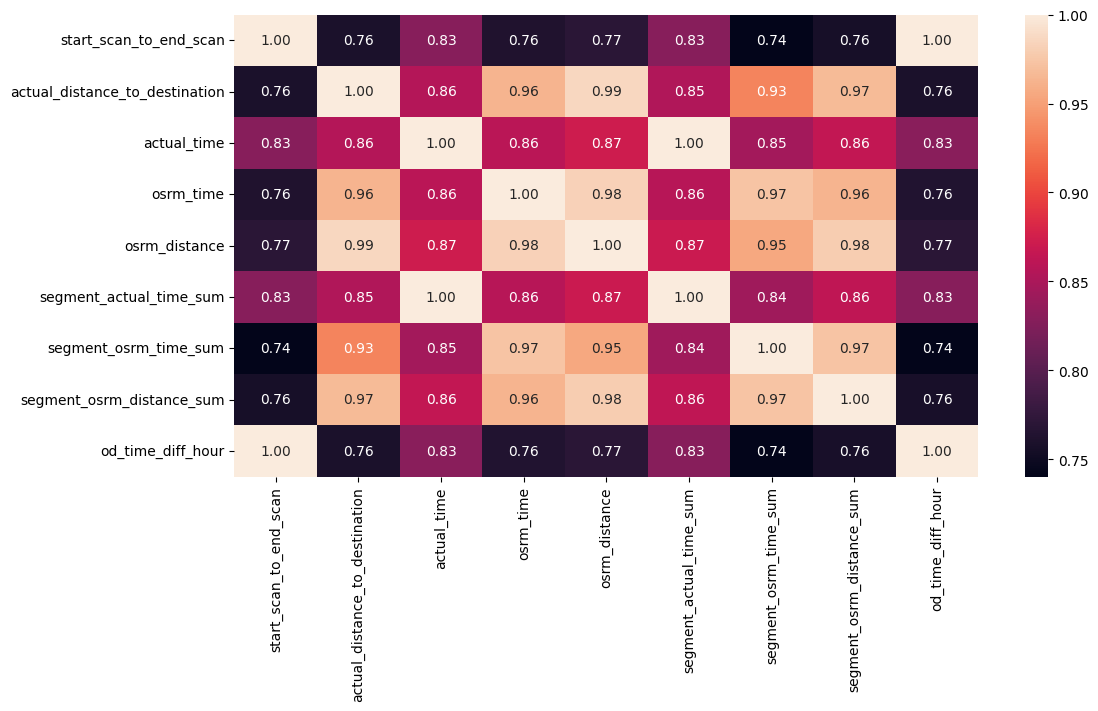

In [67]:
num_cols=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance',
          'segment_actual_time_sum','segment_osrm_time_sum','segment_osrm_distance_sum','od_time_diff_hour']

plt.figure(figsize=(12,6))
sns.heatmap(trip_df[num_cols].corr(),annot=True,cmap='rocket',fmt='.2f')
plt.show()

**Insight**:

 1. A robust correlation of 0.86 exists between 'actual_distance_to_destination' and the associated time, suggesting a significant positive relationship. As the distance increases, there is a notable trend of a corresponding increase in time.
 2. A robust correlation of 0.98 is evident between 'osrm_distance' and 'osrm_time,' indicating a strong positive relationship. Similarly, a comparable relationship is observed between 'Segment_osrm_time' and 'segment_osrm_distance.' The high correlation values signify that changes in distance are highly predictive of corresponding changes in time for both overall and segmented data.

# Hypothesis Testing

## Is their is a significant difference between 'actual time' aggregated value and 'OSRM time' aggregated value 

**Formulating Null and Alternative Hypotheses**

To answer the above question we first set up Null and Alternate Hypothesis:

* ***H0 : There is no significant difference between the aggregated values of 'actual_time' and 'OSRM time'.***
* ***Ha: There is a significant difference between the aggregated values of 'actual_time' and 'OSRM time'.***

**Solution:** To test the above hypothesis, we use Two sample T Test or ttest_ind

In [68]:
t_stat, p_value = ttest_ind(trip_df['actual_time'], trip_df['osrm_time'],equal_var=False)
print(f'T-test between actual_time and OSRM time:\nT-statistic: {t_stat}\nP-value: {p_value}')
# Interpret the results
alpha = 0.05
if p_value < alpha:
    
    print(f"Reject H0, There is a significant difference between the aggregated values of actual_time and OSRM time")
    
else:
    print(f"failed to Reject H0, There is no significant difference between the aggregated values of actual_time and OSRM time")

T-test between actual_time and OSRM time:
T-statistic: 5.38107022875909
P-value: 7.469824292815877e-08
Reject H0, There is a significant difference between the aggregated values of actual_time and OSRM time


**Inference**:

* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
* We have substantial evidence to assert that there exists a significant difference between the aggregated values of 'actual_time' and 'OSRM time'.

## Is their is a significant difference between 'actual time' aggregated value and 'segment actual time' aggregated value


**Formulating Null and Alternative Hypotheses**

To answer the above question we first set up Null and Alternate Hypothesis:

* ***H0 : There is no significant difference between the aggregated values of 'actual_time' and 'segment actual time'.***
* ***Ha: There is a significant difference between the aggregated values of 'actual_time' and 'segment actual time'.***

**Solution:** To test the above hypothesis, we use Two sample T Test or ttest_ind

In [69]:
t_stat, p_value = ttest_ind(trip_df['actual_time'], trip_df['segment_actual_time_sum'],equal_var=False)
print(f'T-test between actual time and  segment actual time:\nT-statistic: {t_stat}\nP-value: {p_value}')
# Interpret the results
alpha = 0.05
if p_value < alpha:
    
    print(f"Reject H0, There is a significant difference between the aggregated values of actual time and segment actual time")
    
else:
    print(f"failed to Reject H0, There is no significant difference between the aggregated values of actual time and segment actual time")

T-test between actual time and  segment actual time:
T-statistic: 0.3103654068127237
P-value: 0.7562856395759595
failed to Reject H0, There is no significant difference between the aggregated values of actual time and segment actual time


**Inference:**

* From the above output, we see that the p value is greater than 0.05, Hence we failed to reject the null hypothesis.
* We have substantial evidence to assert that there is no significant difference between the aggregated values of 'actual time' and 'segment actual time'.

## Difference between 'OSRM distance' aggregated value and 'segment OSRM distance' aggregated value is statistically significant?

**Formulating Null and Alternative Hypotheses**

To answer the above question we first set up Null and Alternate Hypothesis:

* ***H0 : There is no significant difference between the aggregated values of 'OSRM distance' and 'segment OSRM distance'.***
* ***Ha: There is a significant difference between the aggregated values of 'OSRM distance' and 'segment OSRM distance'.***

**Solution:** To test the above hypothesis, we use Two sample T Test or ttest_ind

In [70]:
t_stat, p_value = ttest_ind(trip_df['osrm_distance'], trip_df['segment_osrm_distance_sum'],equal_var=False)
print(f'T-test between OSRM distance and  segment OSRM distance:\nT-statistic: {t_stat}\nP-value: {p_value}')
# Interpret the results
alpha = 0.05
if p_value < alpha:
    
    print(f"Reject H0, There is a significant difference between the aggregated values of OSRM distance and segment OSRM distance")
    
else:
    print(f"failed to Reject H0, There is no significant difference between the aggregated values of OSRM distance and segment OSRM distance")

T-test between OSRM distance and  segment OSRM distance:
T-statistic: -1.254776638081406
P-value: 0.20957138097852004
failed to Reject H0, There is no significant difference between the aggregated values of OSRM distance and segment OSRM distance


**Inference:**

* From the above output, we see that the p value is greater than 0.05, Hence we failed to reject the null hypothesis.
* We have substantial evidence to assert that there is no significant difference between the aggregated values of 'OSRM distance' and 'segment OSRM distance'.

## Is there a statistically significant difference between the aggregated values of 'OSRM time' and 'segment OSRM time', or are they the same?

**Formulating Null and Alternative Hypotheses**

To answer the above question we first set up Null and Alternate Hypothesis:

* ***H0 : There is no significant difference between the aggregated values of 'osrm_time' and 'segment OSRM time'***.
* ***Ha: There is a significant difference between the aggregated values of 'osrm_time 'and 'segment OSRM time'***.

**Solution**: To test the above hypothesis, we use Two sample T Test or ttest_ind

In [71]:
t_stat, p_value = ttest_ind(trip_df['osrm_time'], trip_df['segment_osrm_time_sum'],equal_var=False)
print(f'T-test between OSRM time and  segment OSRM time:\nT-statistic: {t_stat}\nP-value: {p_value}')
# Interpret the results
alpha = 0.05
if p_value < alpha:
    
    print(f"Reject H0, There is a significant difference between the aggregated values of OSRM time and segment OSRM time")
    
else:
    print(f"failed to Reject H0, There is no significant difference between the aggregated values of OSRM time and segment OSRM time")

T-test between OSRM time and  segment OSRM time:
T-statistic: -1.2129815985957597
P-value: 0.22514811890273492
failed to Reject H0, There is no significant difference between the aggregated values of OSRM time and segment OSRM time


**Inference:**

* From the above output, we see that the p value is greater than 0.05, Hence we failed to reject the null hypothesis.
* We have substantial evidence to assert that there is no significant difference between the aggregated values of 'OSRM time' and 'segment OSRM time'.

# Insights

1. A significant seasonality peak is evident in the data, with 87.8% of trips occurring in September, reflecting the festive months in India. Conversely, only 12.2% of trips were completed in October.
2. In the year 2018, Delhivery executed a diverse range of delivery strategies, with a noteworthy 69.3% of completed trips falling under the Carting route type. This emphasizes a significant preference for more flexible and localized transport solutions. On the other hand, 30.7% of deliveries were classified under the Full Truckload (FTL) route type, indicating a substantial portion of shipments requiring dedicated and comprehensive transportation solutions. The distribution between Carting and FTL underscores Delhivery's adaptability in catering to varied logistical needs, ensuring an efficient and tailored approach to meet the demands of their clientele.
3. More trips tend to be created from the 3rd to the 14th day of the month, showing a noticeable upward trend.
4. The peak day for trip creation occurs on the 18th day of the month, constituting 5.47% of the total number of trips generated.
5. There is a notable decrease in trip creation during the last two days of the month, indicating a lower frequency during this period.
6. A declining trend is observed in the number of trips created between 6 am to 10 am, reaching its lowest point at 10 am.
7. A rising trend in the number of trips created is observed from 12 pm to 10 pm, with the highest number recorded at 10 pm.
8. The majority of trips, totaling 2305, originate from Maharashtra, suggesting a significant presence of Delhivery hubs in the region.
9. A limited number of trips are generated from the North Eastern states, Jammu and Kashmir, and Dadra and Nagar Haveli , indicating relatively lower activity in these regions.
10. Bengaluru emerges as a prominent hub for Delhivery, with the majority of trips, totaling 1034, originating from this location. The high volume of trips underscores Bengaluru's status as a key and popular center for Delhivery operations.
11. The North Indian cities, including Noida, Delhi, and Kolkata, witness a moderate number of trips, ranging from 200 to 400, indicating a consistent level of logistical activity in these regions.
12. The majority of deliveries conducted by Delhivery in September and October 2018 were centered in Maharashtra, accounting for approximately 2285 shipments. This suggests a substantial concentration of delivery services in the state during this period.
13. Delhivery recorded single-digit deliveries in the North Eastern states and Daman & Diu, indicating a comparatively lower volume of shipments in these regions.
14. A robust correlation of 0.86 exists between 'actual_distance_to_destination' and the associated time, suggesting a significant positive relationship. As the distance increases, there is a notable trend of a corresponding increase in time.
15. A robust correlation of 0.98 is evident between 'osrm_distance' and 'osrm_time,' indicating a strong positive relationship. Similarly, a comparable relationship is observed between 'Segment_osrm_time' and 'segment_osrm_distance.' The high correlation values signify that changes in distance are highly predictive of corresponding changes in time for both overall and segmented data.
16. The significant difference revealed by the t-test analysis between the aggregated values of 'actual_time' and 'OSRM time' strongly suggests a potential issue with the OSRM device. The discrepancy implies that deliveries were not made on the predicted time by the OSRM device, indicating a need for further investigation or calibration of the device's time predictions.








# Recommendations

**Route Optimization**:
1. Leverage advanced route optimization algorithms to minimize travel time and distance.
2. Consider real-time traffic data to dynamically adjust routes and avoid congestion.
3. Optimize routes based on historical trip data to identify patterns and potential time-saving strategies.

**Load Balancing**:

1. Implement load balancing algorithms to distribute goods efficiently among available trucks.
2. Consider the capacity and constraints of each truck to ensure optimal utilization.

**Time-of-Day Optimization**:

1. Analyze historical data to identify time-of-day patterns for order fulfillment.
2. Schedule trips during non-peak hours to reduce travel time and improve delivery efficiency.

**Corridor Analysis**:

1. Identify high-traffic corridors and optimize routes for these frequently used paths.
2. Consider establishing hubs or distribution centers strategically along these corridors.

**Customer Preferences and Time Windows**:

 Consider customer preferences and time windows for deliveries.Optimize routes to meet specific delivery time commitments and enhance customer satisfaction.

**Real-time Monitoring**:

1. Implement real-time monitoring systems to track truck locations, deliveries, and potential delays.
2. Enable communication channels between drivers and the central operations team for quick problem resolution.